# Web search analytics 

The objective of this project is to build an example of a web search and present the result based on PageRank, the search algorithm developed by _Google_. 

From an imaginary network of web pages and links, we will be able to rank them using the mentioned method and get an idea (on a very diminished scale) of how a web search engine works behind the scenes.

For this task, we will use some R libraries namely: igraph (network analysis), and igraphdata (data sets).

In [7]:
library(igraph)
library(igraphdata)

Suppose that a web surfer searches on the web for the search term “play”. The graph for the webpages, their indexes, and the links between them for this search term is illustrated below.

In [29]:
# Create adjacency matrix
adjmat<-matrix(c(0,1,0,1,1,0,0,0,0,0,0,0,
                1,0,0,0,1,1,0,0,0,0,0,0,
                0,0,0,0,0,1,0,0,0,0,0,0,
                1,0,0,0,1,0,0,0,0,0,0,0,
                1,0,0,0,0,1,0,1,1,1,0,0,
                0,0,1,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,1,0,0,0,
                0,0,0,0,1,0,0,0,0,1,0,0,
                0,0,0,0,1,0,1,1,0,1,1,0,
                0,0,0,0,0,1,0,1,0,0,0,1,
                0,0,0,0,0,0,0,0,1,0,0,1,
                0,0,0,0,0,0,0,0,0,1,0,0),nrow=12,byrow=TRUE)

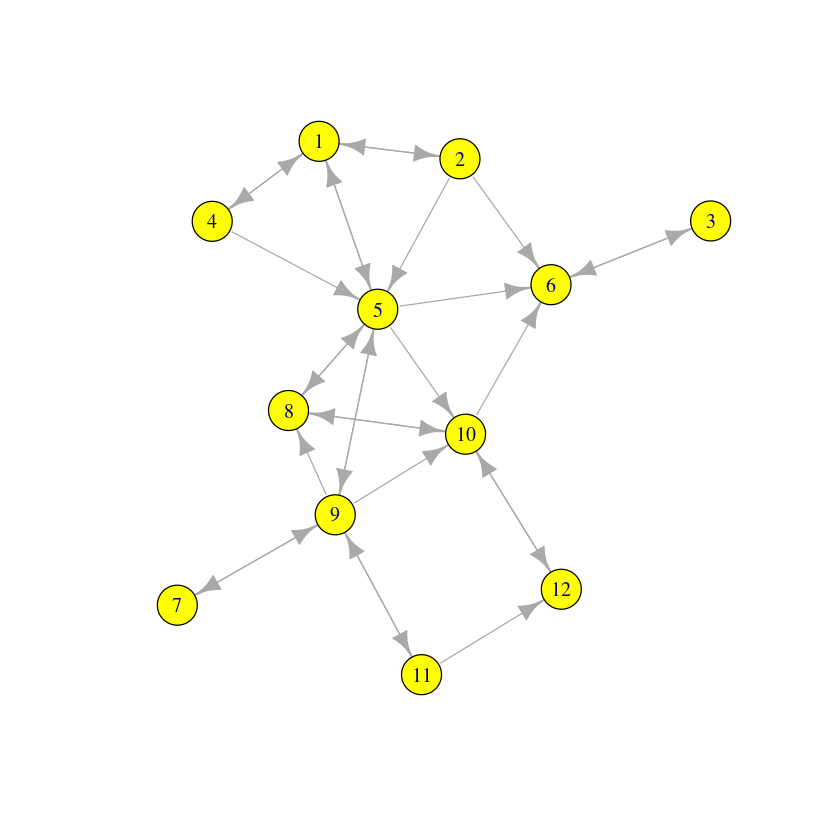

In [30]:
# Visualize the network
graph1 <- graph.adjacency(adjmat,mode='directed')
plot(graph1, layout=layout_with_kk, vertex.color="yellow")

_Nodes description_
1. Google Play
2. RadioPlay.com
3. Music.com
4. MobileGames.com
5. Wikipedia
6. Radio.com
7. Theatremovies.com
8. Shakespeare.com
9. LondonTheatre.com
10. Theatre.com
11. Costumes.com
12. Suomenteatterit.fi

There are twelve webpages represented by each network node directionally linked between themselves. For instance, from Node 10 a web surfer can reach Node 6 but cannot reach Node 10 from Note 6.

## PageRank

One of the assumptions of the PageRank algorithm is that the more inbound links a webpage have, the more important it is. 

From the last network graph we can check that Node 5 has five inbound links which are called _In-Degree_ and five outbound links, i.e., its _Out-Degree_. 

Node 9 has the same _Out-Degree_ as Node 5, but its _In-Degree_ is three. We can visualize the In-Degrees and Out-Degrees of all of the nodes below:

In [31]:
# Calculate the in- and out-degree of the network
dIn <- degree(graph1, mode='in') 
dOut <- degree(graph1, mode='out') 

stackeddata <- rbind(dIn,dOut)

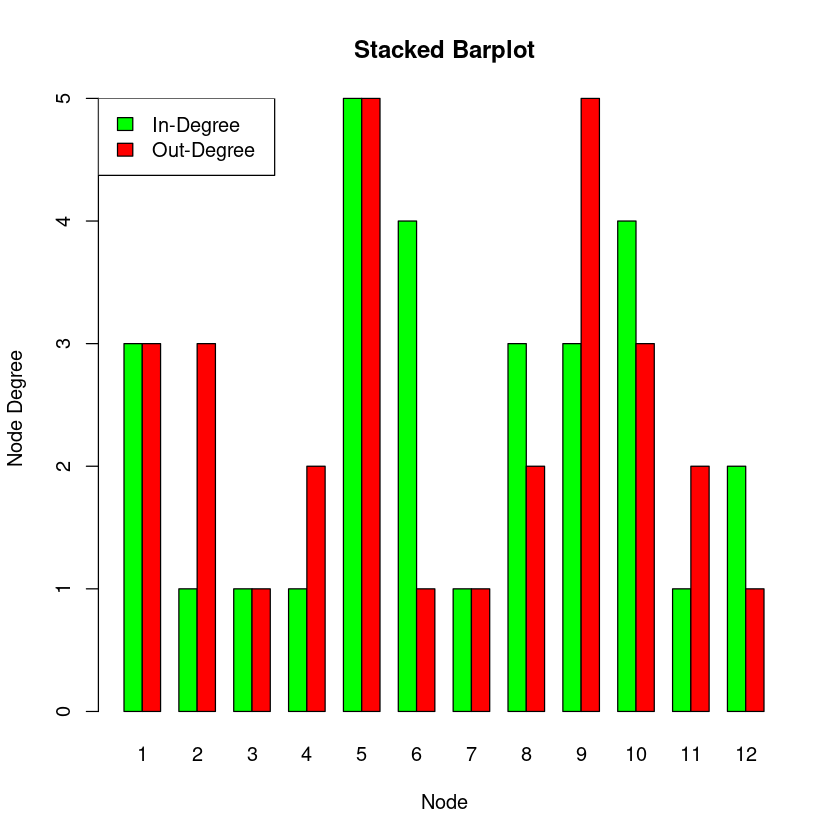

In [32]:
# Visualize the in- and out-degree in a stacked barplot
barplot(stackeddata, beside=TRUE, col=c("#00FF00","#FF0000"),main="Stacked Barplot", xlab = "Node", ylab = "Node Degree", names.arg = c('1','2','3','4','5','6','7','8','9','10','11','12'))
legend('topleft',legend = c("In-Degree","Out-Degree"),fill = c("#00FF00","#FF0000",bty="n"))

We can notice from the _Stacked Barplot_ that Node 5 (Wikipedia), Node 6 (Radio.com), and Node 10 (Theatre.com) will probably be the highest-ranked ones by the PageRank algorithm since they have the highest In-Degrees, five, four, and four, respectively.

To determine the relevance of each webpage in our network, we need to compute each node PageRank. The process starts with the Transition Matrix of the network, which describes what happens to a random web surfer after one step in time. 

The computation of the PageRank is an iteration process that starts with a vector of equal probabilities of being on each webpage of the network. Such vector is pre-multiplied by the Transition Matrix which simulates one step ahead in time. An updated vector is obtained, and the process is repeated until a criterion is met, in our case the largest absolute change of 0.03 (or smaller).

In [45]:
# Create transition matrix
Mmat <- t(adjmat)/matrix(dOut,nrow=12,ncol=12,byrow=TRUE)

# Define initial rank
r <- matrix(c(1/12),nrow=12,ncol=1,byrow=TRUE)
rall <- r
rchange <- 1
n <- 1

while(rchange>0.03) {
  r <- Mmat%*%r
  rall <- cbind(rall,r)
  rchange <- max(abs(rall[,n]-r))
  n <- n+1
}
print(n)

[1] 30


From the results, 30 iterations were necessary to reach the threshold. Below we can check the evolution of our webpages ranks during each step of the transition process.

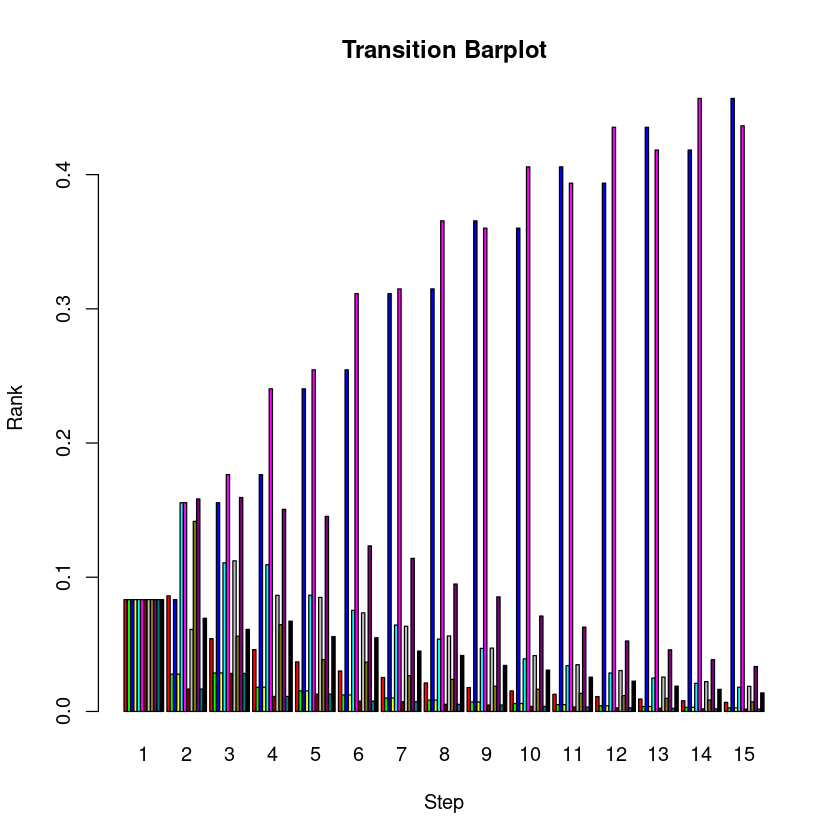

In [34]:
# Visualize the webpage ranks during step 1 to 15 of the transition process 
barplot(rall[,1:15],beside=TRUE,col=c("#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#FF00FF","#800000","#C0C0C0","#808000","#800080","#008080","#000000"),main="Transition Barplot", xlab = "Step", ylab = "Rank", names.arg = c('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'))

At the very beginning of the transition process, we notice that two webpages represented by a dark blue and pink bar have their ranks increased at a faster pace than the others. They are Node 3 (Music.com) and Node 6 (Radio.com) respectively. 

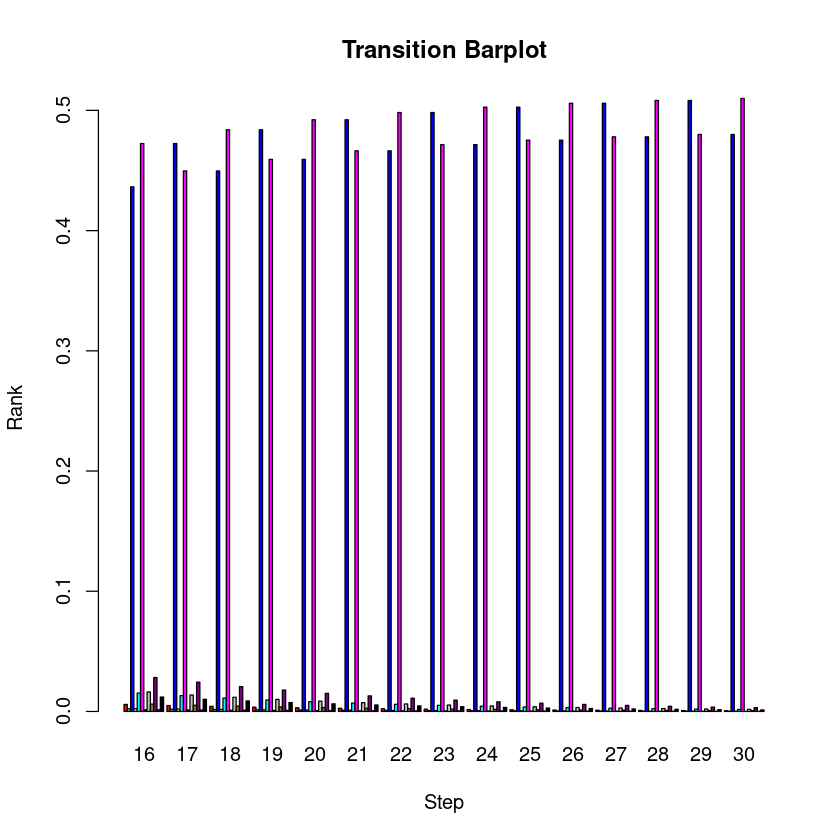

In [35]:
# Visualize the webpage ranks during step 16 to 30 of the transition process 
barplot(rall[,16:30],beside=TRUE,col=c("#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#FF00FF","#800000","#C0C0C0","#808000","#800080","#008080","#000000"),main="Transition Barplot", xlab = "Step", ylab = "Rank", names.arg = c('16','17','18','19','20','21','22','23','24','25','26','27','28','29','30'))

From Step 16 to 30, Node 3 and Node 6 keep the first and second positions in rank, but interchangeably, sometimes Node 3 is in the first place, sometimes in the second. In the end, we have the PageRank of each webpage.

In [36]:
# Build webpages rank
node <- 1:12
result <- data.frame(node,r)
rnk <- result[order(result$r,decreasing=TRUE),]
print(rnk)

   node            r
6     6 0.5099756976
3     3 0.4800097446
10   10 0.0031230974
8     8 0.0017726574
5     5 0.0016853424
12   12 0.0013126949
9     9 0.0006712571
1     1 0.0006382024
2     2 0.0002487093
4     4 0.0002487093
7     7 0.0001569438
11   11 0.0001569438


The final rank of the webpages did not confirm our first estimate based on In-Degrees that Node 5 (Wikipedia) and Node 10 (Theatre.com) would reach high ranking due to their number of inbound links. On the other hand, Node 3 (Music.com) which has a low In-Degree ended in the second-ranked place. This is due that the “quality” of inbound links is also important in PageRank. Since Node 3 has the only outbound link from Node 6 (first ranked place), it has great importance. Comparing Node 6 with Node 5 which both have the same In-Degree, we notice that Node 6 has an inbound link from Node 5, but not vice-versa.

Therefore, if the query result of a web search for the term “play” is limited to four webpages, they will be displayed in this order: 

1. Radio.com
2. Music.com
3. Theatre.com
4. Shakespeare.com

## Topic-Sensitive PageRank 

We assume now that the web search is sensitive to the topic “theatre” due to a large theatre festival in London that has collected a lot of interest from theater enthusiasts all over the world. 

To simulate this, we adjusted our Transition Matrix by:
- Creating a teleporting feature with Beta equals 0.8.
- Creating a teleporting set populated by webpages related to the topic.

We chose Theatremovies.com, Shakespeare.com, LondonTheatre.com, Theatre.com, and Suomenteatteri.fi as members of our teleporting set. We also defined the limit for the largest absolute change to 0.01 (or smaller).

In [44]:
# Adjust transition matrix
beta <- 0.8
teleportset <- c(0,0,0,0,0,0,1,1,1,1,0,1)
Amat <- beta*Mmat + (1-beta)*matrix(teleportset/sum(teleportset),nrow=12,ncol=12,byrow=FALSE)

# Define initial rank
r <- matrix(c(1/12),nrow=12,ncol=1,byrow=TRUE)
rall <- r
rchange <- 1
n <- 1

while(rchange>0.01) {
  r <- Amat%*%r
  rall <- cbind(rall,r)
  rchange <- max(abs(rall[,n]-r))
  n <- n+1
}
print(n)

[1] 9


From the results, 9 iterations were necessary to reach the threshold. Below we can check the evolution of our webpages ranks during each step of the transition process.

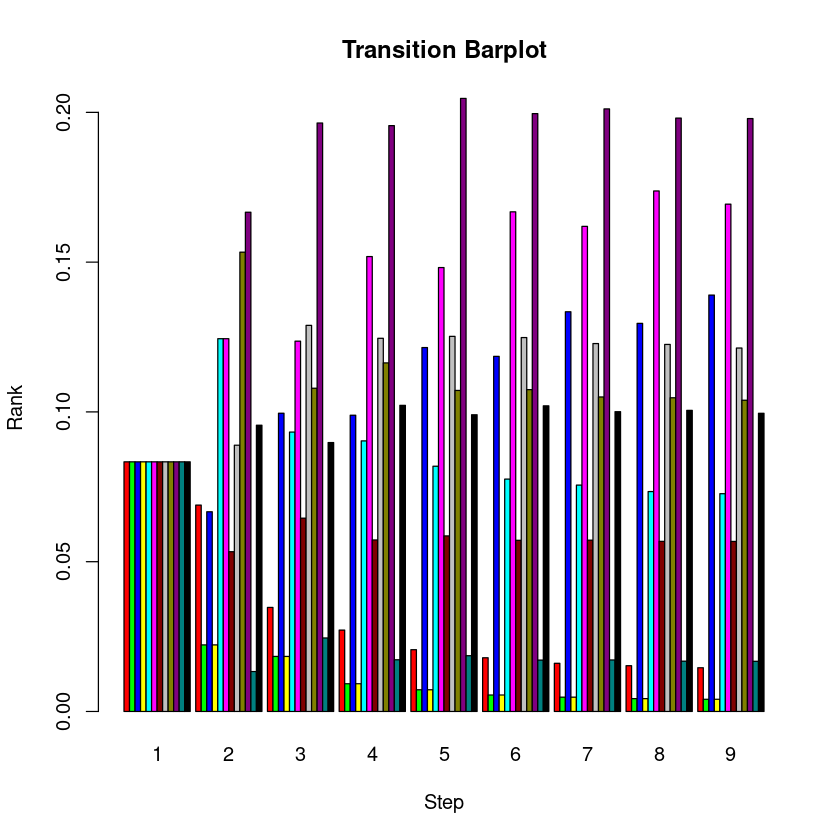

In [38]:
# Visualize the webpage ranks during step 1 to 9 of the transition process 
barplot(rall[,1:9],beside=TRUE,col=c("#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#FF00FF","#800000","#C0C0C0","#808000","#800080","#008080","#000000"),main="Transition Barplot", xlab = "Step", ylab = "Rank", names.arg = c('1','2','3','4','5','6','7','8','9'))

As we can check, the results were quite different from previous. At this time, Node 10 (purple bar), which is part of the teleporting set, grows in importance faster than the other nodes. Nevertheless, Node 6 (pink bar) and Node 3 (dark blue bar) is still important and both ended with high ranks. Other teleporting set members like Node 8 (grey bar), Node 9 (golden bar), and Node 12 (black bar) that were very low ranked in the last result became relevant in this new topic-sensitive query. Below is the new rank table.

In [39]:
# Build webpages rank
node <- 1:12
result2 <- data.frame(node,r)
rnk2 <- result2[order(result2$r,decreasing=TRUE),]
print(rnk2)

   node           r
10   10 0.197923411
6     6 0.169350274
3     3 0.139001876
8     8 0.121321376
9     9 0.103901930
12   12 0.099541183
5     5 0.072698866
7     7 0.056755098
11   11 0.016755098
1     1 0.014602537
2     2 0.004074176
4     4 0.004074176


But how the teleportation factor impact these results? We can change beta to 0.5 and check it.

In [47]:
# Adjust transition matrix for beta=0.5
beta <- 0.5
teleportset <- c(0,0,0,0,0,0,1,1,1,1,0,1)
Amat <- beta*Mmat + (1-beta)*matrix(teleportset/sum(teleportset),nrow=12,ncol=12,byrow=FALSE)

# Define initial rank
r <- matrix(c(1/12),nrow=12,ncol=1,byrow=TRUE)
rall <- r
rchange <- 1
n <- 1

while(rchange>0.01) {
  r <- Amat%*%r
  rall <- cbind(rall,r)
  rchange <- max(abs(rall[,n]-r))
  n <- n+1
}
print(n)

[1] 4


Below is the Transition Barplot graph:

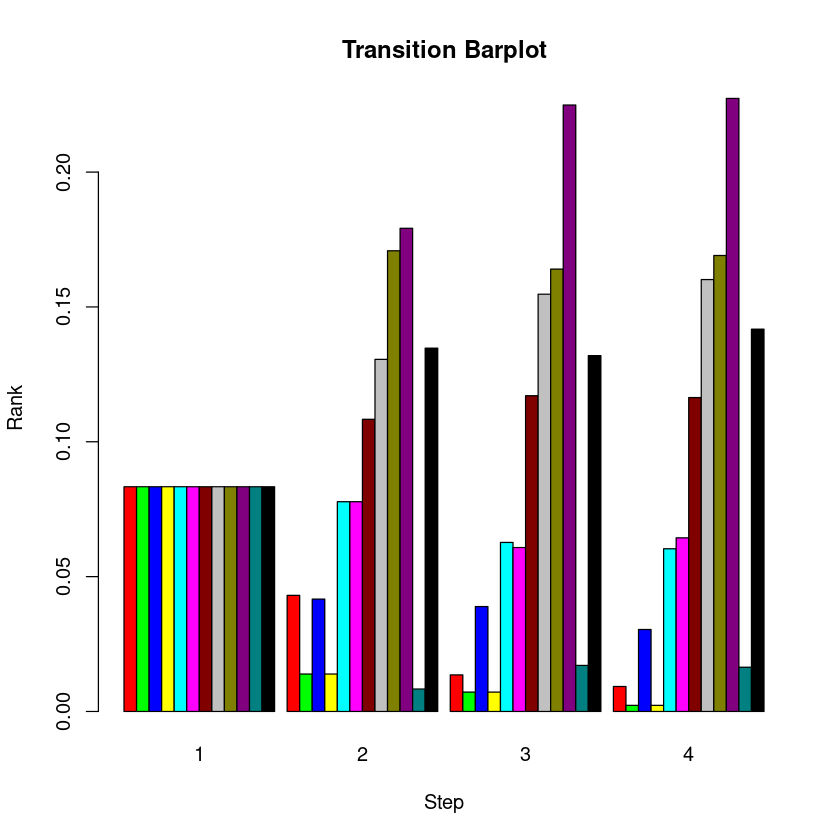

In [41]:
# Visualize the webpage ranks during step 1 to 9 of the transition process 
barplot(rall[,1:4],beside=TRUE,col=c("#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#FF00FF","#800000","#C0C0C0","#808000","#800080","#008080","#000000"),main="Transition Barplot", xlab = "Step", ylab = "Rank", names.arg = c('1','2','3','4'))


As we see from the last _Trasition Barplot_, only 4 iterations are necessary to reach the threshold and the higher-ranked nodes are the members of the teleporting set since they increased in importance, i.e., we decrease the importance of network structure. 

If we set beta to 0, we give all importance to members of the teleporting set and disconsider network structure.

In [48]:
# Adjust transition matrix for beta=0
beta <- 0
teleportset <- c(0,0,0,0,0,0,1,1,1,1,0,1)
Amat <- beta*Mmat + (1-beta)*matrix(teleportset/sum(teleportset),nrow=12,ncol=12,byrow=FALSE)

# Define initial rank
r <- matrix(c(1/12),nrow=12,ncol=1,byrow=TRUE)
rall <- r
rchange <- 1
n <- 1

while(rchange>0.01) {
  r <- Amat%*%r
  rall <- cbind(rall,r)
  rchange <- max(abs(rall[,n]-r))
  n <- n+1
}
print(n)

[1] 3


Below is the Transition Barplot graph of this new situation:

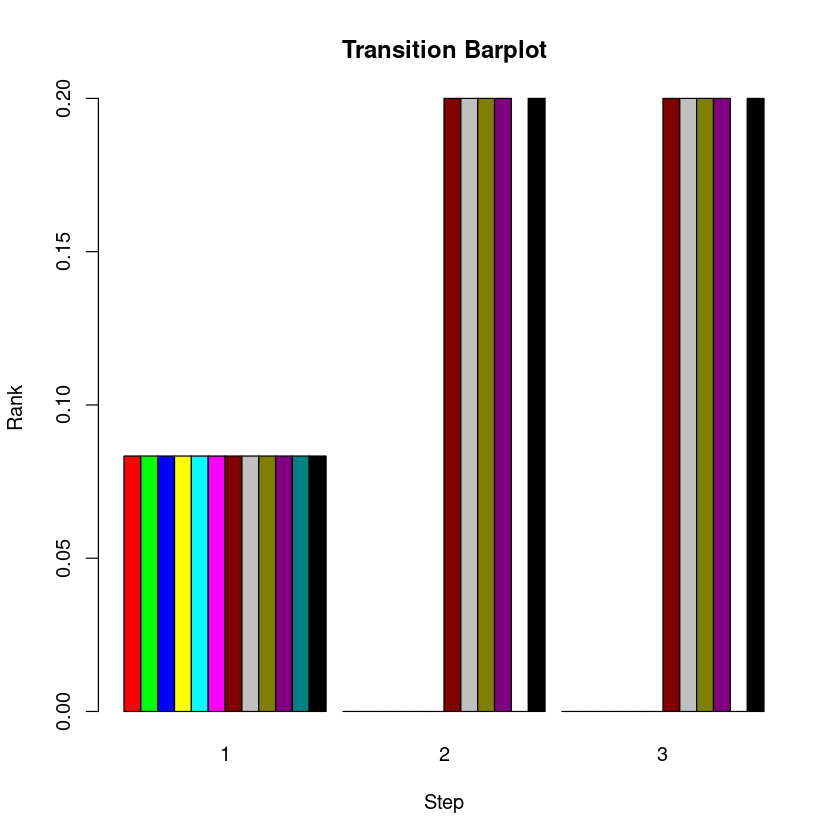

In [43]:
# Visualize the webpage ranks during step 1 to 9 of the transition process 
barplot(rall[,1:3],beside=TRUE,col=c("#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#FF00FF","#800000","#C0C0C0","#808000","#800080","#008080","#000000"),main="Transition Barplot", xlab = "Step", ylab = "Rank", names.arg = c('1','2','3'))


Finally, if we set the teleporting factor to 1.0 we remove all the importance of the teleporting set. PageRank results will be slightly different from the very first rank since it differs in the limit for the largest absolute change and the number of iterations. But rank should be the same.

## Conclusion

In this mini-project, we created a small network of webpages to simulate how search engines rank webpages to display results for the web search query. We used the PageRank algorithm developed and used by _Google_ to achieve the results. This is a relevant topic for marketing today since these web searches are matched with digital advertisements that consume a significant portion of marketing budgets. It is worthy of mention the existence of some spamming methods which try to deceive search engines and artificially rank high some webpages. 